In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import PredictionErrorDisplay, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv("Agrofood_co2_emission.csv")
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


# Preprocessing Data
As done in the preprocessing deliverable, we will first drop features missing at least 10% of their values, with the exception of IPPU, as we determined that IPPU is much too impactful on temperature to remove it. Then, we'll drop row-wise null values.

In [ ]:
# checking the percentage of missing values
df.isna().sum()/len(df)*100

Area                                0.000000
Year                                0.000000
Savanna fires                       0.445083
Forest fires                        1.335248
Crop Residues                      19.942570
Rice Cultivation                    0.000000
Drained organic soils (CO2)         0.000000
Pesticides Manufacturing            0.000000
Food Transport                      0.000000
Forestland                          7.078248
Net Forest conversion               7.078248
Food Household Consumption          6.791098
Food Retail                         0.000000
On-farm Electricity Use             0.000000
Food Packaging                      0.000000
Agrifood Systems Waste Disposal     0.000000
Food Processing                     0.000000
Fertilizers Manufacturing           0.000000
IPPU                               10.667624
Manure applied to Soils            13.323762
Manure left on Pasture              0.000000
Manure Management                  13.323762
Fires in o

For our 10% threshold, we can see that crop residues , manure applied to soils, manure management, and on-farm energy use meet the criteria. IPPU does as well, but as stated earlier, we chose to not drop it. The 4 columns and null values will be dropped:

In [ ]:
# dropping the columns with >10% missing values
drop_cols = ['Manure Management', 'On-farm Electricity Use', 'Crop Residues', 'Manure applied to Soils']
df_preproc = df.drop(columns=drop_cols, axis=1)

# dropping null values, row-wise
df_preproc = df_preproc.dropna()

df_preproc

,Area,Year,Savanna fires,Forest fires,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
31,Albania,1990,5.5561,7.0253,23.5200,110.5705,2.0,46.9645,72.8581,0.0000,...,383.3071,0.0,0.0,320.8805,2086075.0,1195379.0,1676902.0,1618163.0,3475.291240,0.735750
32,Albania,1991,5.5561,7.0253,6.2720,110.5705,2.0,47.9519,72.8581,0.0000,...,394.0694,0.0,0.0,195.1879,2073348.0,1202083.0,1675168.0,1626914.0,5680.135772,-0.461500
33,Albania,1992,5.5561,7.0253,1.8816,110.5705,2.0,40.5272,72.8581,0.0000,...,400.0541,0.0,0.0,163.1332,2033508.0,1207079.0,1670550.0,1633189.0,5221.131572,0.318250
34,Albania,1993,5.5561,7.0253,1.0976,110.5705,2.0,57.6592,72.8581,0.0000,...,426.4171,0.0,0.0,126.8489,1983942.0,1205641.0,1663515.0,1637195.0,5316.973272,0.270500
35,Albania,1994,5.5561,7.0253,0.0000,110.5705,3.0,72.4242,72.8581,0.0000,...,546.0098,0.0,0.0,94.9545,1936056.0,1204539.0,1654796.0,1639203.0,5564.287672,1.202667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,7.4088,0.0000,75.0,251.1465,76500.2982,10662.4408,...,2721.1459,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,7.9458,0.0000,67.0,255.7975,76500.2982,10662.4408,...,2744.8763,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,8.1399,0.0000,66.0,327.0897,76500.2982,10662.4408,...,2790.0949,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,7.8322,0.0000,73.0,290.1893,76500.2982,10662.4408,...,2828.7215,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


As the original dataset is a mixture of several different datasets, some features are somewhat similar, and can be combined into broader categories to reduce dimensionality with a slight loss of information. The following features will be created:

- **Fire Emissions**: Savanna Fires, Forest Fires, Fires in Organic Soils, and Fires in Humid Tropical Forests
- **Industrial Processing Emissions**: Pesticides Manufacturing, Fertilizers Manufacturing, and IPPU
- **Total Population**: Total Population - Male, Total Population - Female, Rural Population, and Urban Population
- **Forestry Emissions**: Forest land and Net Forest Conversion
- **Food-related Emissions**: Food Processing, Food Packaging, Food Transport, Food Retail, and Food Household Consumption

The **Fire Emissions** category is a natural combination, as is the **Industrial Processing Emissions** category, since pesticides and fertilizers are both 'industrial products'. **Total Population** is a decision that may be reverted, as the ratio of rural and urban population may be impactful to an area's temperature. **Forestry Emissions** is simpy an aggregate between the amount of emissions that forest land absorbs and the emissions gained by deforestation.

In [ ]:
# creating the new columns by combining the emissions from the various features
df_preproc['Fire Emissions'] = df_preproc['Fires in humid tropical forests'] + df_preproc['Fires in organic soils'] + df_preproc['Forest fires'] + df_preproc['Savanna fires']
df_preproc['Industrial Processing Emission'] =  df_preproc['Pesticides Manufacturing'] + df_preproc['Fertilizers Manufacturing'] + df_preproc['IPPU']
df_preproc['Total Population'] = df_preproc['Total Population - Male'] + df_preproc['Total Population - Female']
df_preproc['Forestry Emissions'] = df_preproc['Forestland'] + df_preproc['Net Forest conversion']
df_preproc['Food-related Emissions'] = df_preproc['Food Processing'] + df_preproc['Food Packaging'] + df_preproc['Food Transport'] + df_preproc['Food Retail'] + df_preproc['Food Household Consumption']

# dropping the columns that were inserted into the broder features
drop_cols = ['Fires in humid tropical forests', 'Fires in organic soils', 'Forest fires', 'Savanna fires',
             'Pesticides Manufacturing', 'Fertilizers Manufacturing', 'IPPU',
             'Total Population - Male', 'Total Population - Female',
             'Forestland', 'Net Forest conversion',
             'Food Processing', 'Food Packaging', 'Food Transport', 'Food Retail', 'Food Household Consumption',
             'Urban population', 'Rural population', 'total_emission',
             'Area']
df_preproc = df_preproc.drop(columns=drop_cols, axis=1)

df_preproc

,Year,Rice Cultivation,Drained organic soils (CO2),Agrifood Systems Waste Disposal,Manure left on Pasture,On-farm energy use,Average Temperature °C,Fire Emissions,Industrial Processing Emission,Total Population,Forestry Emissions,Food-related Emissions
31,1990,23.5200,110.5705,444.4512,383.3071,320.8805,0.735750,12.5814,1125.636617,3295065.0,72.8581,205.697324
32,1991,6.2720,110.5705,443.8552,394.0694,195.1879,-0.461500,12.5814,3534.520749,3302082.0,72.8581,196.936324
33,1992,1.8816,110.5705,445.0997,400.0541,163.1332,0.318250,12.5814,3153.065049,3303739.0,72.8581,187.102124
34,1993,1.0976,110.5705,446.7996,426.4171,126.8489,0.270500,12.5814,3169.672249,3300710.0,72.8581,217.179924
35,1994,0.0000,110.5705,449.4347,546.0098,94.9545,1.202667,12.5814,3119.235049,3293999.0,72.8581,232.520324
...,...,...,...,...,...,...,...,...,...,...,...,...
6960,2016,7.4088,0.0000,1077.2392,2721.1459,417.3150,1.120250,1422.5157,3519.062847,14452705.0,87162.7390,1285.487000
6961,2017,7.9458,0.0000,1093.3441,2744.8763,398.1644,0.046500,1562.2731,2183.665253,14751102.0,87162.7390,1256.070800
6962,2018,8.1399,0.0000,1108.5523,2790.0949,465.7735,0.516333,1779.2052,2159.952805,15052183.0,87162.7390,1398.671200
6963,2019,7.8322,0.0000,1121.3255,2828.7215,444.2335,0.985667,1762.6311,3504.470399,15354607.0,87162.7390,1407.191900


## Further Reducing Dimensionality with PCA
As done in the last deliverable, the features with a high correlation will be reduced into smaller components using *Principal Component Analysis*.

In [ ]:
# first, removing our target output, since from here there won't be any further reduction in our row count
temp_increase = df_preproc['Average Temperature °C']
df_preproc.drop('Average Temperature °C', axis=1)

# scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_preproc)

# create model and fit onto data
pca = PCA(n_components=10)
pca.fit(scaled_data)

# transform data
reduced_data = pca.transform(scaled_data)
reduced_data = pd.DataFrame(reduced_data)
reduced_data

,0,1,2,3,4,5,6,7,8,9
0,-0.728464,0.280925,-1.361642,-0.405443,0.809783,0.475483,0.297820,-0.097927,-0.116413,-0.004787
1,-0.747154,0.873961,-2.619477,-0.506699,-0.425036,-0.402567,-0.106558,-0.091944,-0.045539,-0.058246
2,-0.731999,0.437947,-1.681294,-0.406588,0.268828,0.106005,0.128357,-0.095540,-0.085784,-0.026236
3,-0.731259,0.433431,-1.662420,-0.389372,0.155581,0.035434,0.094579,-0.092144,-0.075898,-0.029546
4,-0.708789,-0.081188,-0.555295,-0.268769,1.000439,0.647777,0.377977,-0.091119,-0.128770,0.012698
...,...,...,...,...,...,...,...,...,...,...
4966,-0.714897,-0.413824,0.957496,0.799252,-0.347551,-0.388432,-0.104679,-0.341719,0.157713,-0.050830
4967,-0.736675,0.121199,-0.162109,0.714016,-1.464203,-1.171842,-0.470009,-0.325655,0.236607,-0.100861
4968,-0.720805,-0.149122,0.433420,0.782924,-1.070952,-0.883708,-0.331478,-0.324266,0.220282,-0.082229
4969,-0.704887,-0.424878,1.026358,0.851846,-0.678155,-0.596322,-0.196608,-0.327801,0.195057,-0.063038


In [ ]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature for each component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = list(df_preproc.columns)

# get the names by index
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# create a dictionary that holds each principal component and its most
# significant feature
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

components = pd.DataFrame(dic.items())
components

,0,1
0,PC0,Agrifood Systems Waste Disposal
1,PC1,Fire Emissions
2,PC2,Year
3,PC3,Forestry Emissions
4,PC4,Year
5,PC5,Rice Cultivation
6,PC6,Fire Emissions
7,PC7,Manure left on Pasture
8,PC8,On-farm energy use
9,PC9,Rice Cultivation


The above table lists the components and their most impactful feature. We will refer to this when examining the models created later. Although we could drop some components based on a threshold of the variance they create, we will leave it at 10 components.

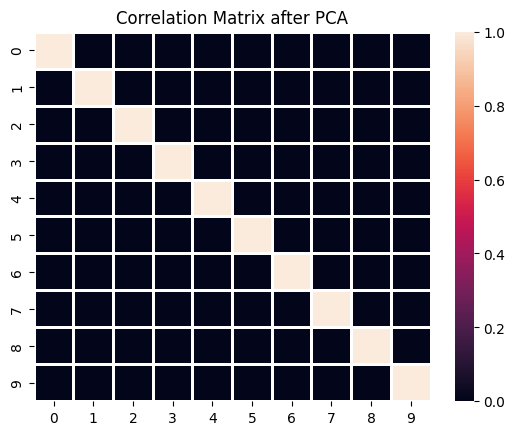

In [ ]:
# create heatmap once again and check for correlations
sns.heatmap(reduced_data.corr(), annot=False, linewidths=1)

plt.title('Correlation Matrix after PCA')
plt.show()

# Modeling

## Multilinear Regression

In the heatmap above, we examined the collinearity of the features after PCA reduction. Since there is no multicollinearity between them, we will employ a multilinear regression, using the PCA components as the independent variables and the average temperature increase as the dependent variable.

In [ ]:
# for simplicity, we will refer to the independent variables as X, and the target feature, the average temperature increase, as y
X = reduced_data
y = temp_increase

# creating a 70-30 split for training and testing data
X_train, X_test, y_train, reg_y_test = train_test_split(X, y, test_size = 0.3)

# creating the linear regression model
regression = LinearRegression()

# creating a KFold object to cross validate the linear model
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
# performing cross-validation scoring
scores = cross_val_score(regression, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
scores

array([-0.00029463, -0.00033487, -0.00030631, -0.00025987, -0.00033677])

Based on the cross validation scoring above, the multilinear regression model seems to be a great fit for the data, as the *Root Mean Squared Error* for each fold is very close to zero.

In [ ]:
scores = cross_val_score(regression, X_train, y_train, scoring='r2', cv=folds)
scores

array([0.99999971, 0.99999964, 0.99999972, 0.99999981, 0.99999967])

The *R-Squared* score tells the same story, as seen above

In [ ]:
# since the cross-validation showed great results, fit the model on the data set and examine results
regression.fit(X_train, y_train)

# showing the y-intercept and the coefficient for each PCA component
print("Intercept: ", regression.intercept_)
print("Coefficients:")
list(zip(X, regression.coef_))

Intercept:  0.8944492508586552
Coefficients:


[(0, 0.006380304092534807),
 (1, -0.1700014797026192),
 (2, 0.3620099783750116),
 (3, 0.032849043823219445),
 (4, 0.3181232628919104),
 (5, 0.22751877260443937),
 (6, 0.10587749685622713),
 (7, -0.0027304731284367306),
 (8, -0.02036551161515779),
 (9, 0.01428325562645961)]

In [ ]:
reg_pred = regression.predict(X_test)
diff = pd.DataFrame({'Actual value': reg_y_test, 'Predicted value': reg_pred})

diff

,Actual value,Predicted value
2413,0.616667,0.616638
3529,1.009083,1.009132
5186,0.805833,0.805886
3268,1.324750,1.324099
3678,0.911167,0.911064
...,...,...
1471,0.701500,0.701635
3262,0.467250,0.467074
1967,1.387000,1.387040
3901,1.616417,1.616436


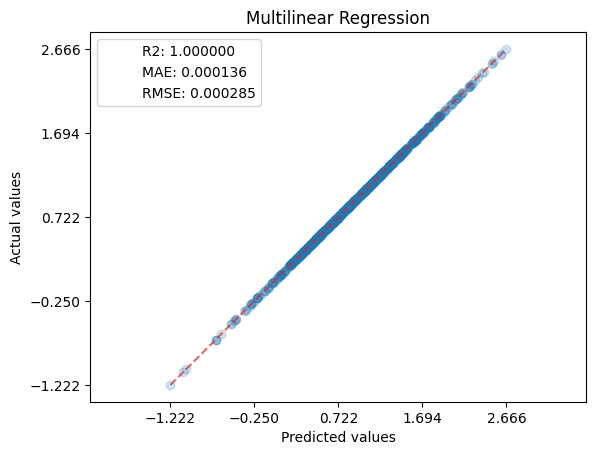

In [ ]:
reg_r2 = r2_score(reg_y_test, reg_pred)
reg_mae = mean_absolute_error(reg_y_test, reg_pred)
reg_rmse = mean_squared_error(reg_y_test, reg_pred, squared=False)

reg_scores = {
  "Labels": reg_y_test,
  "Predictions": reg_pred,
	"R2": reg_r2,
	"MAE": reg_mae,
	"RMSE": reg_rmse
}

display = PredictionErrorDisplay.from_predictions(
	y_true=reg_y_test,
	y_pred=reg_pred,
	kind="actual_vs_predicted",
	scatter_kwargs={"alpha": 0.2, "color": "tab:blue"},
	line_kwargs={"color": "tab:red"},
)

plt.title("Multilinear Regression")

for name, score in reg_scores.items():
  if name not in ["Predictions", "Labels"]:
	  plt.plot([], [], " ", label=f"{name}: {score:.6f}")

plt.legend(loc="upper left")
plt.show()

As seen in the table and plot above, the model was highly successful in predicting the actual value of the average temperature increase.

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# for simplicity, we will refer to the independent variables as X, and the target feature, the average temperature increase, as y
X = reduced_data
y = temp_increase

# creating a 70-30 split for training and testing data
X_train, X_test, y_train, rf_y_test = train_test_split(X, y, test_size = 0.3)

# creating the random forest model with the oob_score parameter set to true
rf = RandomForestRegressor(oob_score=True, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=100)

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_oob = rf.oob_score_

In [ ]:
rf_pred = rf.predict(X_test)
diff = pd.DataFrame({'Actual value': rf_y_test, 'Predicted value': rf_pred})

diff

,Actual value,Predicted value
1796,0.767667,0.737791
6328,1.397333,1.392597
3184,0.810417,0.812887
5868,0.869083,0.873719
5937,0.999250,0.983730
...,...,...
4292,0.606917,0.615336
2487,0.936083,0.932670
6030,0.732583,0.767918
5754,0.666917,0.677397


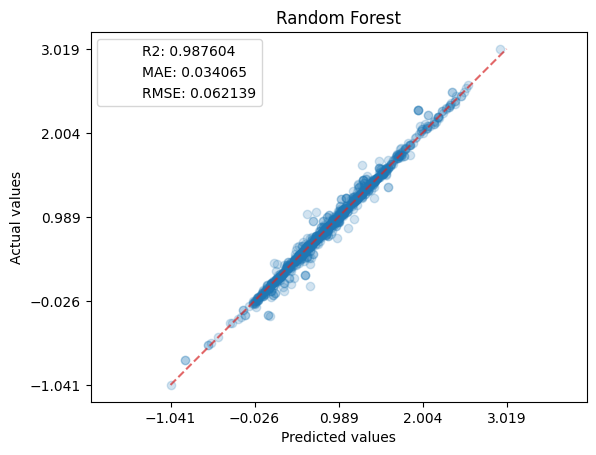

In [ ]:
rf_r2 = r2_score(rf_y_test, rf_pred)
rf_mae = mean_absolute_error(rf_y_test, rf_pred)
rf_rmse = mean_squared_error(rf_y_test, rf_pred, squared=False)

rf_scores = {
	"Labels": rf_y_test,
	"Predictions": rf_pred,
	"R2": rf_r2,
	"MAE": rf_mae,
	"RMSE": rf_rmse
}

display = PredictionErrorDisplay.from_predictions(
	y_true=rf_y_test,
	y_pred=rf_pred,
	kind="actual_vs_predicted",
	scatter_kwargs={"alpha": 0.2, "color": "tab:blue"},
	line_kwargs={"color": "tab:red"},
)

plt.title("Random Forest")

for name, score in rf_scores.items():
	if name not in ["Predictions", "Labels"]:
	  plt.plot([], [], " ", label=f"{name}: {score:.6f}")

plt.legend(loc="upper left")
plt.show()

## Hyperparameter Tuning the Random Forest Regressor

The random forest has performed really well. We can do better with some hyperparameter tuning. One way to reduce the correlations is to limit the number of features, m, chosen by the model for each internal node. As a rule of thumb, it is typical for m to be the square root of the total number of features. Although this might cause the tree to choose suboptimal features as internal nodes, due to this change producing many drastically different trees this will further reduce the variance component of error. By default, the scikit-learn library sets this parameter, max_features, to be the total number of features. Another hyperparameter to tune is the number of decision trees the random forest regressor produces. The benefit of increasing this number is that it does not lead to overfitting because the average of all the trees is taken. However, the time to fit will be slower. By default, sklearn sets this parameter, n_estimators, to 100.  The last hyperparameter we decided to tune is the minimum samples required to split an internal node. A higher number will cause there to be less external/leaf nodes. By default, sklearn sets this parameter, min_samples_split, to 2.

In [ ]:
# create a grid of hyperparameters to search over
param_grid = {
	'n_estimators': [100, 150, 200, 250, 300],
	'max_features': ['sqrt', 6, 10],
	'min_samples_split': [2, 5, 10, 15],
	"oob_score": [True]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# fit the grid search to the data
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)
# print the oob_score
print("OOB score: ", grid_search.best_estimator_.oob_score_)

In [ ]:
# Using the best parameters
params = {'max_features': 6, 'min_samples_split': 2, 'n_estimators': 250}
gridSearchRF = RandomForestRegressor(oob_score=True, random_state=100, **params)

In [ ]:
# Model hyperparameters
gridSearchRF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 6,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gridSearchRF.fit(X_train, y_train)

RandomForestRegressor(max_features=6, n_estimators=250, oob_score=True,
                      random_state=100)

In [ ]:
gridRF_oob = gridSearchRF.oob_score_

In [ ]:
gridrf_pred = gridSearchRF.predict(X_test)

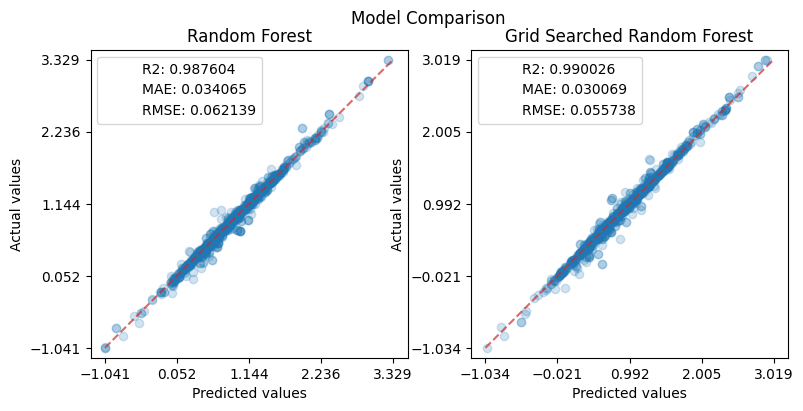

In [ ]:
grf_r2 = r2_score(rf_y_test, gridrf_pred)
grf_mae = mean_absolute_error(rf_y_test, gridrf_pred)
grf_rmse = mean_squared_error(rf_y_test, gridrf_pred, squared=False)

grf_scores = {
  "Labels": rf_y_test,
  "Predictions": gridrf_pred,
	"R2": grf_r2,
	"MAE": grf_mae,
	"RMSE": grf_rmse
}

predictions = {"Random Forest": rf_scores, "Grid Searched Random Forest": grf_scores}

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

ax = 0
for model, model_scores in predictions.items():
    display = PredictionErrorDisplay.from_predictions(
        y_true=model_scores["Labels"],
        y_pred=model_scores["Predictions"],
        ax=axs[ax],
        kind="actual_vs_predicted",
        scatter_kwargs={"alpha": 0.2, "color": "tab:blue"},
        line_kwargs={"color": "tab:red"},
    )

    axs[ax].set_title(model)

    for name, score in model_scores.items():
        if name not in ["Predictions", "Labels"]:
            axs[ax].plot([], [], " ", label=f"{name}: {score:.6f}")

    axs[ax].legend(loc="upper left")
    ax += 1
plt.suptitle("Model Comparison")
plt.show()

In [ ]:
print('Random Forest OOB score:', rf_oob)
print('Grid Search Random Forest OOB score:', gridRF_oob)

Random Forest OOB score: 0.9871523442334087
Grid Search Random Forest OOB score: 0.988914132965606


The grid search random forest regressor model outperformed the untuned model. However, there are only marginal differences in the R2, MAE, and OOB score after hyperparameter tuning.

## K-Nearest Neighbors Regression

We have established that a linear regression and a tree-based random forest regression both do well in capturing the linear relationship between the independent variables and the *average temperature increase*. For the third model, we'll do a regression using K-Nearest Neighbors, which uses a local estimator based on a 'neighborhood' of similar data points.  

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# for simplicity, we will refer to the independent variables as X, and the target feature, the average temperature increase, as y
X = reduced_data
y = temp_increase

# creating a 70-30 split for training and testing data
X_train, X_test, y_train, knn_y_test = train_test_split(X, y, test_size = 0.3)

# creating the K-Nearest Neighbors regressor object, with the default paramenters
# to being, n_neighbors = 5
knn = KNeighborsRegressor()

# creating a KFold object to cross validate the linear model
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
# performing cross-validation scoring
rmse_scores = cross_val_score(knn, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
r2_scores = cross_val_score(knn, X_train, y_train, scoring='r2', cv=folds)
mae_scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

print("Root Mean Squared Error:")
print(rmse_scores)
print("R-Squared:")
print(r2_scores)
print("Mean Absolute Error")
print(mae_scores)

Root Mean Squared Error:
[-0.10265755 -0.09552487 -0.09938295 -0.11060402 -0.10942936]
R-Squared:
[0.96598345 0.97156416 0.96976754 0.9606797  0.96579986]
Mean Absolute Error
[-0.05465631 -0.05371458 -0.05315104 -0.05643606 -0.05275648]


In [ ]:
print("RMSE: %0.2f mean with a standard deviation of %0.2f" % (rmse_scores.mean(), rmse_scores.std()))
print("R2: %0.2f mean with a standard deviation of %0.2f" % (r2_scores.mean(), r2_scores.std()))
print("MAE: %0.2f mean with a standard deviation of %0.2f" % (mae_scores.mean(), mae_scores.std()))

RMSE: -0.10 mean with a standard deviation of 0.01
R2: 0.97 mean with a standard deviation of 0.00
MAE: -0.05 mean with a standard deviation of 0.00


As seen in the RMSE, R-Squared, and MAE scores, the default parameters of the KNeighborsRegressor() model from scikit-learn are quite good, but we will still employ hyperparameter tuning to hopefully achieve better performance. The most important hyperparamter is the number of neighbors, `n_neighbors`, but we will also search for the best distance `metric` and `weights` function

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Using an exhaustive grid search, we'll search for the best value of `n_neighbors` between a range of 1 and 70, the best metric between *Manhattan* and *Minkowski* distance, and the best weight function

The range of `n_neighbors` to be searched over was chosen based on the `k = sqrt(n)` rule of thumb that is often used. After preprocessing, we have 4971 rows, and the square root is approximately 70. For the distance metrics, Euclidean distance was disregarded, as even after our reduction in dimensionality, we still have 10 dimensions in our data, which results to Euclidean distance being an unreliable distance metric

In [ ]:
# grid of possible parameter combinations
param_grid = {
    'n_neighbors': np.arange(1, 71),
    'metric': ['manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

# making a GridSearchCV object with the K-Neighbors regressor to find best params
# based on RMSE
clf = GridSearchCV(knn, param_grid, scoring='neg_root_mean_squared_error', refit = True, verbose = 3)

clf.fit(X_train, y_train)

Checking the best parameters found by the grid search:

In [ ]:
clf.best_params_

The only thing that changed from the default parameters of KNeighborsRegressor() was the weight function. According to the grid search, a variable weight function based on distance led to a better performing model than a uniform one. We'll redo the cross validation, this time with the best parameter results:

In [ ]:
# creating the K-Nearest Neighbors regressor object, with the parameters found by the grid search
knn = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', weights = 'distance')

# creating a KFold object to cross validate the linear model
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# performing cross-validation scoring using rmse
rmse_scores = cross_val_score(knn, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
r2_scores = cross_val_score(knn, X_train, y_train, scoring='r2', cv=folds)
mae_scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

print("RMSE: %0.2f mean with a standard deviation of %0.2f" % (rmse_scores.mean(), rmse_scores.std()))
print("R2: %0.2f mean with a standard deviation of %0.2f" % (r2_scores.mean(), r2_scores.std()))
print("MAE: %0.2f mean with a standard deviation of %0.2f" % (mae_scores.mean(), mae_scores.std()))

RMSE: -0.09 mean with a standard deviation of 0.00
R2: 0.97 mean with a standard deviation of 0.00
MAE: -0.05 mean with a standard deviation of 0.00


The hyperparameter tuning led to a difference of -0.01 in the average RMSE score between the two cross-validation runs. Not very impactful, but we will continue to fit the model onto the training data and examine its accuracy

In [ ]:
# since the cross-validation showed great results, fit the model on the data set and examine results
knn.fit(X_train, y_train)

# getting the predicted values of the model for the testing data
knn_pred = knn.predict(X_test)

# comparing the predicted values to the real values
diff = pd.DataFrame({'Actual value': knn_y_test, 'Predicted value': knn_pred})

diff

,Actual value,Predicted value
5939,1.012000,1.040757
6605,0.884583,1.038621
3931,0.643250,0.726501
3235,1.302750,1.288483
4389,0.697667,0.725203
...,...,...
3426,-0.186250,-0.179154
2281,0.788167,0.852779
3689,2.401083,2.321081
6559,1.319833,1.211780


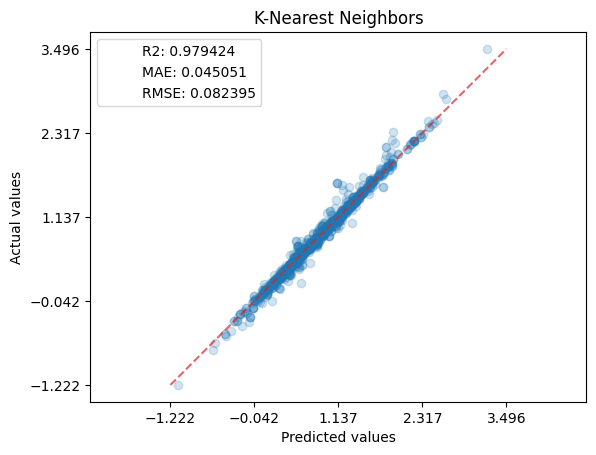

In [ ]:
knn_r2 = r2_score(knn_y_test, knn_pred)
knn_mae = mean_absolute_error(knn_y_test, knn_pred)
knn_rmse = mean_squared_error(knn_y_test, knn_pred, squared=False)

knn_scores = {
  "Labels": knn_y_test,
  "Predictions": knn_pred,
	"R2": knn_r2,
	"MAE": knn_mae,
	"RMSE": knn_rmse
}

display = PredictionErrorDisplay.from_predictions(
	y_true=knn_y_test,
	y_pred=knn_pred,
	kind="actual_vs_predicted",
	scatter_kwargs={"alpha": 0.2, "color": "tab:blue"},
	line_kwargs={"color": "tab:red"},
)

plt.title("K-Nearest Neighbors")

for name, score in knn_scores.items():
	if name not in ["Predictions", "Labels"]:
	  plt.plot([], [], " ", label=f"{name}: {score:.6f}")

plt.legend(loc="upper left")
plt.show()

The K-Nearest Neighbors regressor was fairly accurate, as seen above

# Comparison between Models

Of the three models, the simple multivariate linear regression was the most accurate. This may be due to the very strong linear correlation between the independent variables, the CO2 emissions (kt) from different sources, and the dependent variable, the average increase in temperature in celsius. It is to be expected, as the more CO2 is emitted into the atmosphere, the more prominent the Greenhouse Effect is.

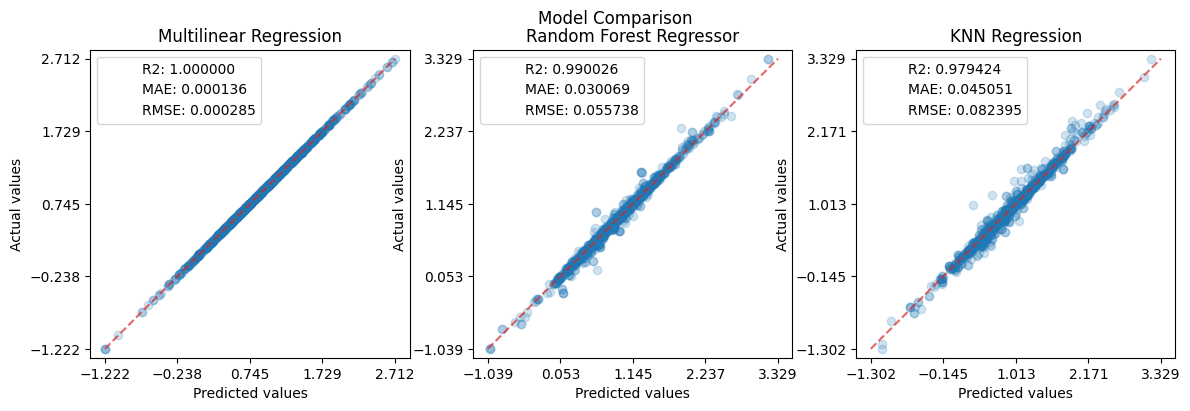

In [ ]:
# compare the accuracy scatter plots from the three models

predictions = {"Multilinear Regression": reg_scores, "Random Forest Regressor": grf_scores, "KNN Regression": knn_scores}

fig, axs = plt.subplots(1, 3, figsize=(14, 4))

ax = 0
for model, model_scores in predictions.items():
    display = PredictionErrorDisplay.from_predictions(
        y_true=model_scores["Labels"],
        y_pred=model_scores["Predictions"],
        ax=axs[ax],
        kind="actual_vs_predicted",
        scatter_kwargs={"alpha": 0.2, "color": "tab:blue"},
        line_kwargs={"color": "tab:red"},
    )

    axs[ax].set_title(model)

    for name, score in model_scores.items():
        if name not in ["Predictions", "Labels"]:
            axs[ax].plot([], [], " ", label=f"{name}: {score:.6f}")

    axs[ax].legend(loc="upper left")
    ax += 1
plt.suptitle("Model Comparison")
plt.show()

# Summary

A summary of the hyperparameters for each model and the results of hyperparameter tuning is shown below

In [ ]:
data = {'Linear Regression': ['N/A', 'N/A', 'N/A'],
        'Random Forest Regression': ['[n_estimators, max_features, min_samples_split]', '[250, 6, 2]', '[100, 1.0, 2]'],
        'K-Nearest Neighbors Regression': ['[n_neighbors, distance_metric, weight]', '[5, minkowski, distance]', '[5, minkowski, uniform]']}
hyperparameter_df = pd.DataFrame.from_dict(data, orient='index',
                        columns=['Hyperparameter', 'Tuned Values', 'Default Values'])
hyperparameter_df

,Hyperparameter,Tuned Values,Default Values
Linear Regression,N/A,N/A,N/A
Random Forest Regression,"[n_estimators, max_features, min_samples_split]","[250, 6, 2]","[100, 1.0, 2]"
K-Nearest Neighbors Regression,"[n_neighbors, distance_metric, weight]","[5, minkowski, distance]","[5, minkowski, uniform]"
